# Distribution Example B - Asymptotics of H

In [149]:
import DistBTrunc as dbt

from math import sqrt
from matplotlib import pyplot as plot
from scipy.fft import fft
from sympy.ntheory import factorint

from LocUtil import Grid1
from LocMath import FftUnFoldReal

In [23]:
import importlib as il
il.reload(dbt)

<module 'DistBTrunc' from 'F:\\Users\\Kenne.DESKTOP-BT6VROU\\Documents\\GitHub\\ManetSim\\CdfFit\\Note Books\\DistBTrunc.py'>

In [24]:
lev = 30e-3
nPlot = 101

In [25]:
zMin,zMax = (dbt.CdfZTrunc(lev))
zMin,zMax

(-1.854835218363413, 2.0930488731865875)

Text(0, 0.5, 'Residual')

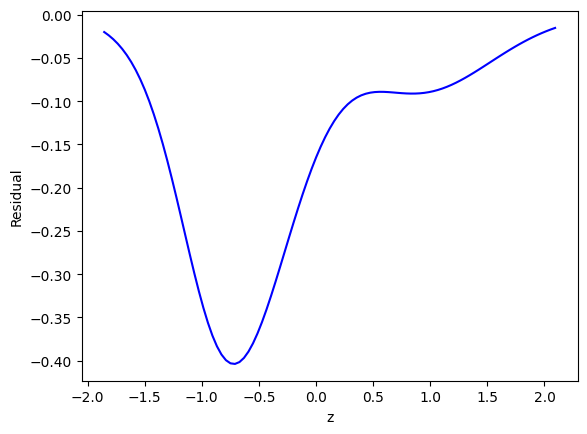

In [28]:
zGrid = Grid1(zMin,zMax, nPlot)
resGrid = [dbt.ResZ(z) for z in zGrid]

plot.plot(zGrid,resGrid, c='blue')

plot.xlabel('z')
plot.ylabel('Residual')

## Compute Fourier Transform

In [110]:
nSamp = 1_024
mid = nSamp // 2
mid

512

In [70]:
zGrid = Grid1(zMin,zMax, nSamp)
resSamp = [dbt.ResZ(z) for z in zGrid]

In [71]:
resTrans = fft(resSamp)

Text(0, 0.5, 'FFT Index')

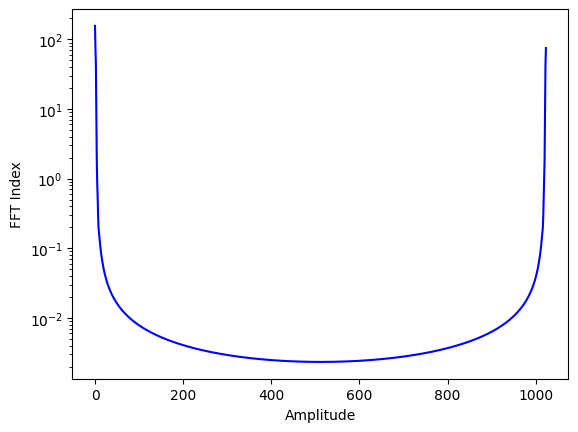

In [123]:
absTrans = [abs(t) for t in resTrans]
plot.semilogy(absTrans, c='blue')

plot.xlabel('Amplitude')
plot.ylabel('FFT Index')

# look at positive frequencies only.
Negative frequencies are just the complex conjugate of the positive frequencies

In [152]:
posFreq = tuple(resTrans[i] for i in range(mid))

In [153]:
deltaZ = (zMax - zMin) / nSamp
deltaZ

0.0038553555581542975

In [154]:
deltaF = 1 / (2*deltaZ)
deltaF

129.6897244516064

TODO:  Double check that this is 1/(2h) and not 2/h

Text(0, 0.5, 'Amplitude of Positive Frequency')

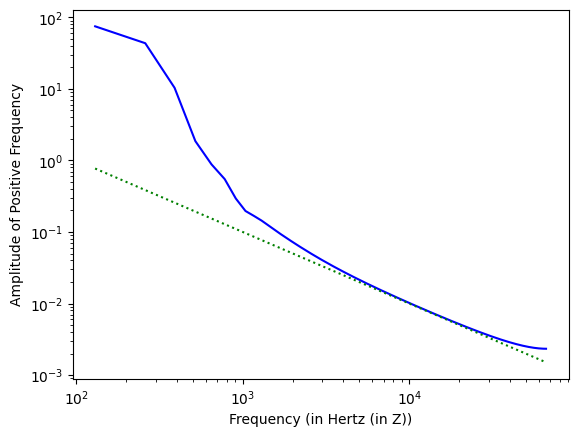

In [155]:
freq = tuple(k * deltaF for k in range(1,mid))
amp = tuple(abs(posFreq[i]) for i in range(1,mid))
plot.loglog(freq,amp, c='blue')

line = tuple(100/f for f in freq)
plot.loglog(freq,line, ':', c='green')

plot.xlabel('Frequency (in Hertz (in Z))')
plot.ylabel('Amplitude of Positive Frequency')

TODO:  The fact that the constant close to 100 is dumb luck

In [156]:
energy = sqrt(sum(abs(a)**2 for a in posFreq))
energy

178.62218664374802

Text(0, 0.5, 'Fraction of Energy')

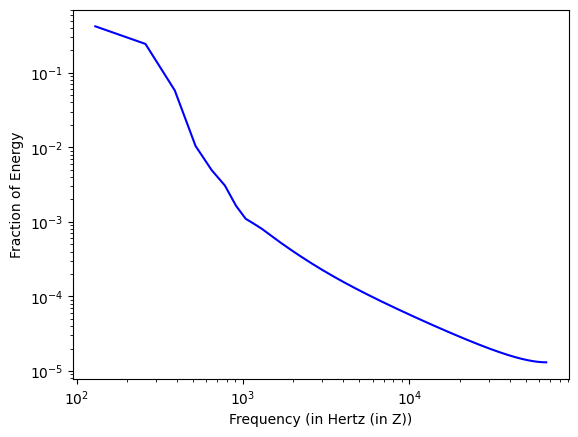

In [160]:
freq = tuple(k * deltaF for k in range(1,mid))
frac = tuple(abs(posFreq[i]) / energy for i in range(1,mid))
plot.loglog(freq,frac, c='blue')

# line = tuple(100/f for f in freq)
# plot.loglog(freq,line, ':', c='green')

plot.xlabel('Frequency (in Hertz (in Z))')
plot.ylabel('Fraction of Energy')

In [ ]:
## 